In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from data_processing.data_processing import load

import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from data_processing.data_processing import aggregate

### Read

In [2]:
temp_zuz = pd.read_csv('data/temp_zuz_fixed.csv', delimiter=',')

In [3]:
df = load(csv_path='data/data.csv')

In [4]:
# df = aggregate(df, 5)

In [5]:
df

,001fcx00211.pv,001fcx00221.pv,001fcx00231.pv,001fcx00241.pv,001fir01307.daca.pv,001fir01308.daca.pv,001fir01309.daca.pv,001fir01310.daca.pv,001fir01311.daca.pv,001fir01312.daca.pv,...,001uxm0rf02.daca.pv,001uxm0rf03.daca.pv,037tix00254.daca.pv,037tix00264.daca.pv,prazonka_fe,prazonka_s,prob_corg,prob_fe,prob_s,temp_zuz
czas,,,,,,,,,,,,,,,,,,,,,
2020-09-30 22:00:00+00:00,56.729077,54.724422,11.966905,22.493207,108.702362,112.280388,110.013796,108.761583,110.604901,104.500427,...,92.024078,92.405281,24.665309,24.526161,4.48,8.98,8.6,4.55,9.87,1297.0
2020-09-30 22:01:00+00:00,54.771942,54.734675,12.026410,22.593412,108.846612,112.334600,109.906645,108.879083,110.644046,104.371977,...,92.024206,92.405239,24.663982,24.526161,4.48,8.98,8.6,4.55,9.87,NaN
2020-09-30 22:02:00+00:00,54.695816,54.774163,11.953671,22.428933,108.827640,112.362508,109.970932,108.844765,110.621665,104.387912,...,92.024334,92.405196,24.662656,24.526161,4.48,8.98,8.6,4.55,9.87,NaN
2020-09-30 22:03:00+00:00,54.154394,54.985713,12.052065,22.335388,108.623473,112.386061,109.836948,108.717994,110.464245,104.418573,...,92.024462,92.405153,24.661329,24.526161,4.48,8.98,8.6,4.55,9.87,NaN
2020-09-30 22:04:00+00:00,54.693184,54.490742,12.027310,22.412620,108.746784,112.396792,109.966910,108.978605,110.603660,104.464328,...,92.024590,92.405110,24.660003,24.525475,4.48,8.98,8.6,4.55,9.87,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-11 06:07:00+00:00,58.795139,54.973000,10.087992,27.894094,105.635039,104.272930,109.424067,107.431204,108.324738,107.900376,...,97.178771,97.493002,24.034415,23.914914,5.86,8.85,8.4,5.68,11.02,NaN
2021-10-11 06:08:00+00:00,54.448054,54.905028,9.947703,28.020189,105.655574,104.286570,109.432529,107.506626,108.266853,107.873508,...,97.169362,97.493045,24.034119,23.914282,5.86,8.85,8.4,5.68,11.02,NaN
2021-10-11 06:09:00+00:00,53.660009,55.608914,9.886163,28.001451,105.596196,104.221272,109.458378,107.553794,108.278251,107.881827,...,97.176449,97.493088,24.033823,23.913650,5.86,8.85,8.4,5.68,11.02,NaN


In [6]:
feature_desc_df = pd.read_csv('data/feature_desc.csv', index_col='name')
def feature_desc(name):
    if type(name)==str:
        return feature_desc_df.loc[name]['desc']
    else:
        return feature_desc_df.loc[name]['desc'].values

### Group

In [7]:
TIR = df.columns[df.columns.str.contains('tir')].values
FIR = df.columns[df.columns.str.contains('fir')].values
TIX1 = df.columns[df.columns.str.contains('001tix')].values
UXM = df.columns[df.columns.str.contains('uxm')].values
TXI = df.columns[df.columns.str.contains('txi')].values
TIX37 = df.columns[df.columns.str.contains('037tix')].values
FCX = df.columns[df.columns.str.contains('fcx')].values
PR = df.columns[df.columns.str.contains('pr')].values
NIR = df.columns[df.columns.str.contains('nir')].values

group_names = {
    'TIR':'WODY POWROTNE KOLEKTORÓW [°C]',
    'FIR':'WODY CHŁODZĄCE KOLEKTORÓW [°C]',
    'TIX1':'TEMP POD 2 WARSTWĄ WYMURÓWKI [°C]',
    'UXM':'WENT. ODCZ_ZAD OBROTÓW [%]',
    'TXI':'TEMP. NA KOL. [°C]',
    'TIX37':'TEMP. WODY ZASIL.OBIEG PZ [°C]',
    'FCX':'REG [Mg/h]',
    'PR':'Prob i prazonka [%]',
    'NIR':'SUMARYCZNA MOC CIEPLNA ODEBRANA - CAŁKOWITA [MW]'
}   
group_names

{'TIR': 'WODY POWROTNE KOLEKTORÓW [°C]',
 'FIR': 'WODY CHŁODZĄCE KOLEKTORÓW [°C]',
 'TIX1': 'TEMP POD 2 WARSTWĄ WYMURÓWKI [°C]',
 'UXM': 'WENT. ODCZ_ZAD OBROTÓW [%]',
 'TXI': 'TEMP.\xa0NA KOL. [°C]',
 'TIX37': 'TEMP. WODY ZASIL.OBIEG PZ [°C]',
 'FCX': 'REG [Mg/h]',
 'PR': 'Prob i prazonka [%]',
 'NIR': 'SUMARYCZNA MOC CIEPLNA ODEBRANA - CAŁKOWITA [MW]'}

### Distributions

In [8]:
def plot_histograms(columns, ncols=3):
    n = len(columns)
    if n<ncols:
        ncols=n
        nrows=1
    else:
        nrows = int(np.ceil(n/ncols))
        
    f, axes = plt.subplots(figsize=(14, (8*nrows)//ncols), nrows=nrows, ncols=ncols)
    plt.subplots_adjust(wspace=0.2, hspace=0.6)
    for col, ax in zip(columns, axes.flatten()):
        sns.histplot(df[col], ax=ax, kde=True)
        ax.set_title(feature_desc(col), {'fontsize':10})

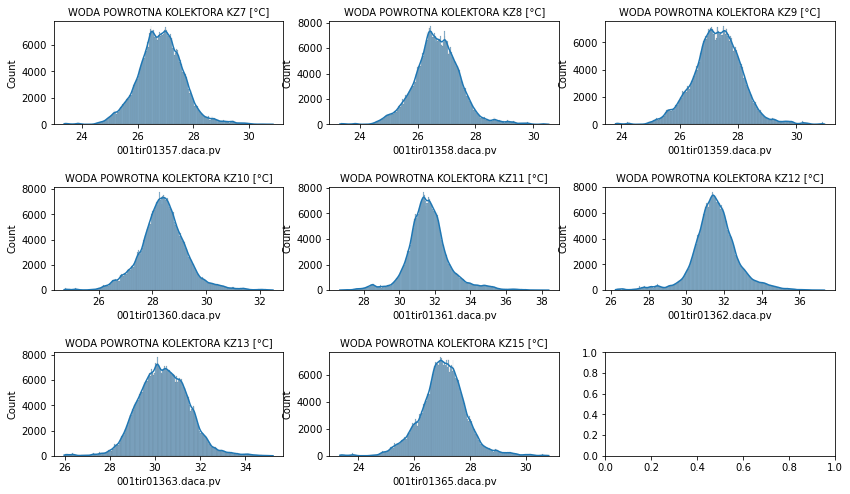

In [9]:
plot_histograms(TIR)

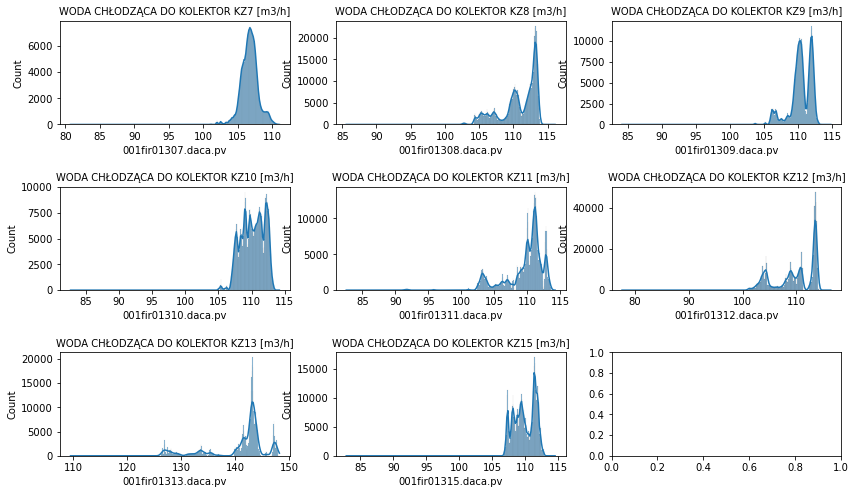

In [10]:
plot_histograms(FIR)

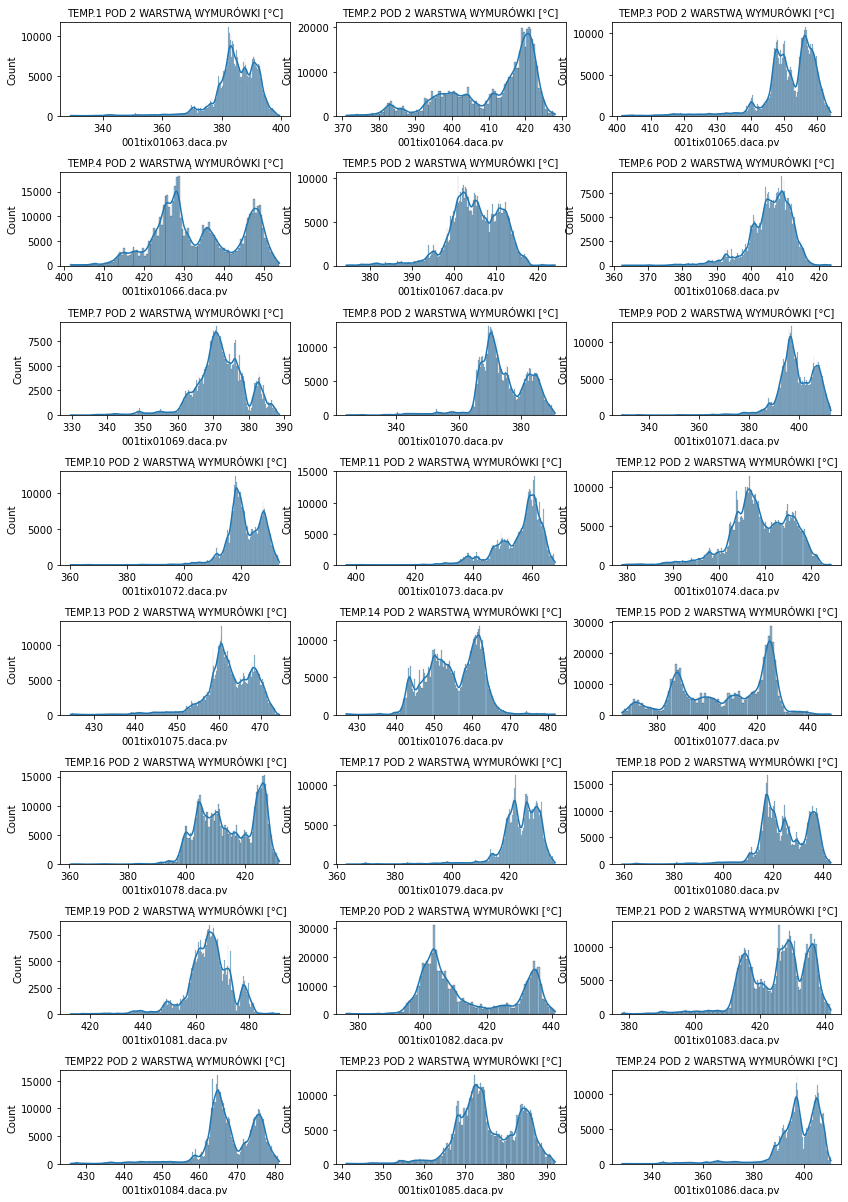

In [11]:
plot_histograms(TIX1)

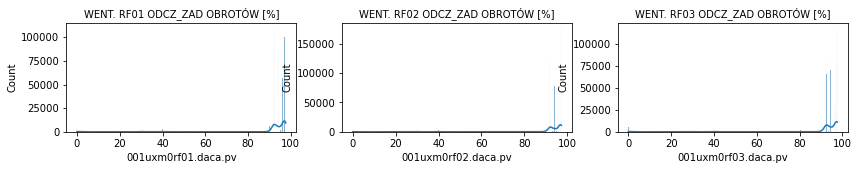

In [12]:
plot_histograms(UXM)

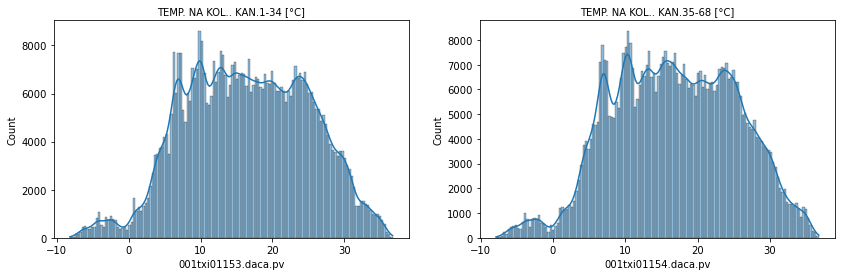

In [13]:
plot_histograms(TXI)

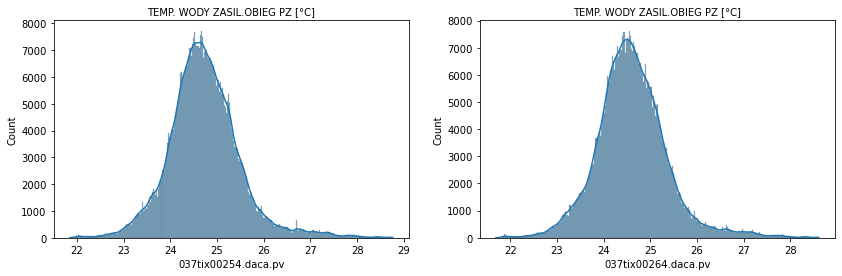

In [14]:
plot_histograms(TIX37)

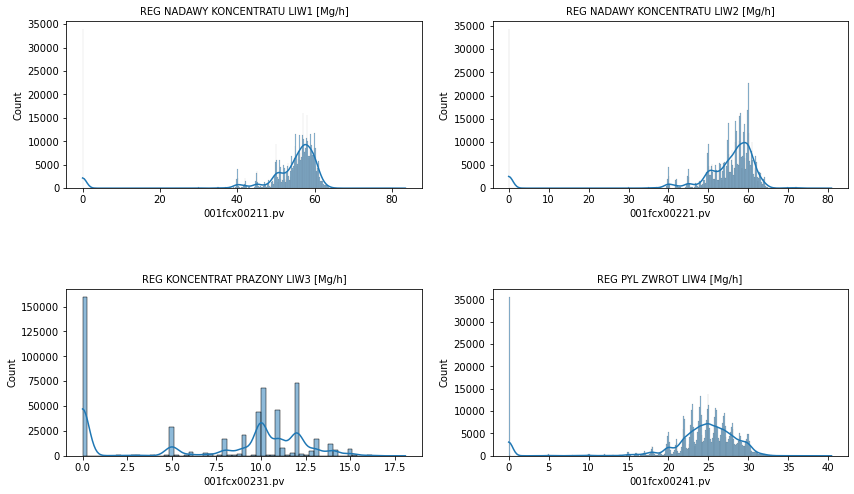

In [15]:
plot_histograms(FCX, ncols=2)

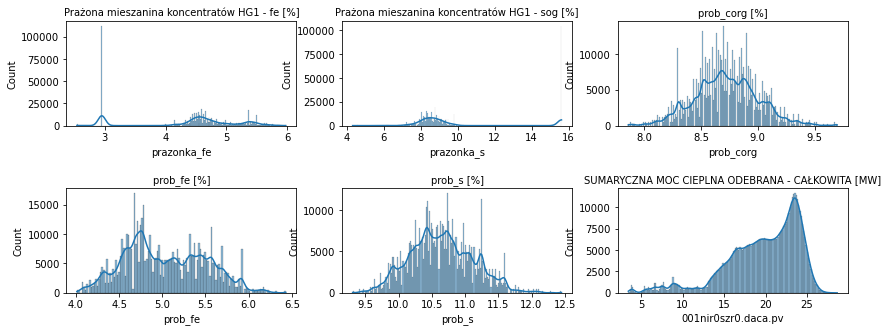

In [16]:
plot_histograms(np.append(PR, NIR))

### Correlations

In [17]:
def corr_plots(*dfs, titles=None, ncols=2, size=14):
    n = len(dfs)
    if n<ncols:
        ncols=n
        nrows=1
    else:
        nrows = int(np.ceil(n/ncols))     
    
    f, axes = plt.subplots(figsize=(size, (size*nrows)//ncols), nrows=nrows, ncols=ncols, squeeze=False)
    plt.subplots_adjust(wspace=0.4, hspace=0.2)
    
    for df, ax, i in zip(dfs, axes.flatten(), range(n)):
        corr = df.corr()
        cmap = sns.diverging_palette(230, 20, as_cmap=True)
        sns.heatmap(corr, cmap=cmap, center=0,
                square=True, linewidths=.5, ax=ax, annot=(len(df.columns)*ncols<25))
        if titles:
            ax.set_title(titles[i])

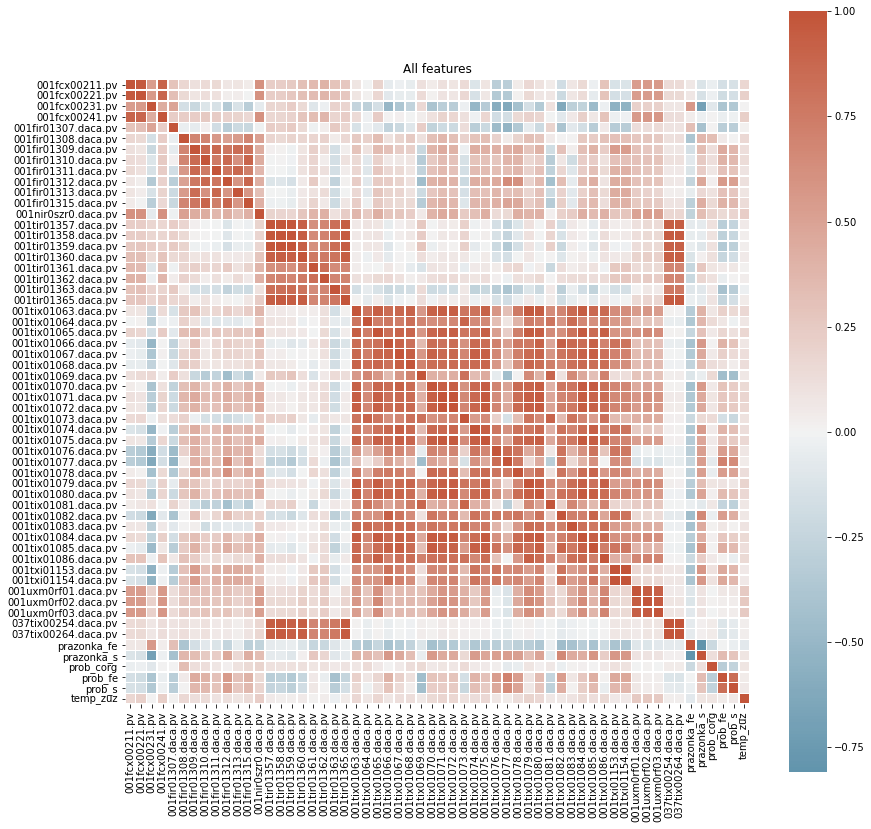

In [18]:
corr_plots(df, titles=["All features"])

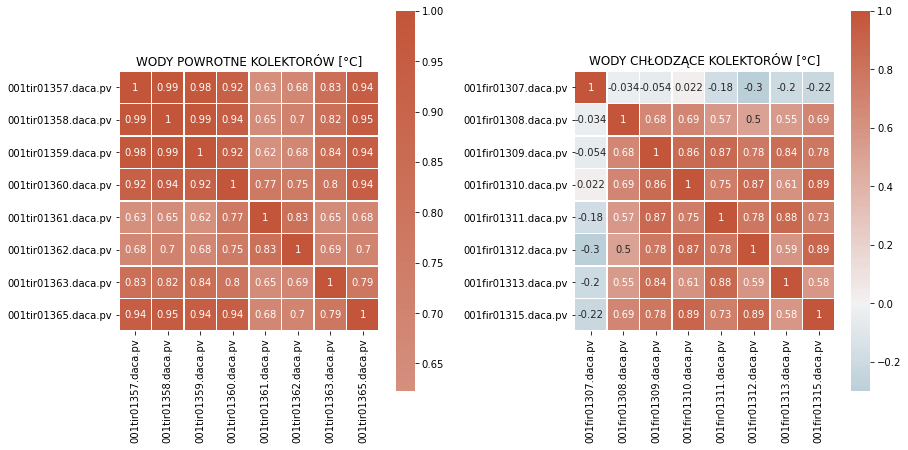

In [19]:
corr_plots(df[TIR], 
           df[FIR], 
           titles=["WODY POWROTNE KOLEKTORÓW [°C]", 
                   "WODY CHŁODZĄCE KOLEKTORÓW [°C]"]
          )

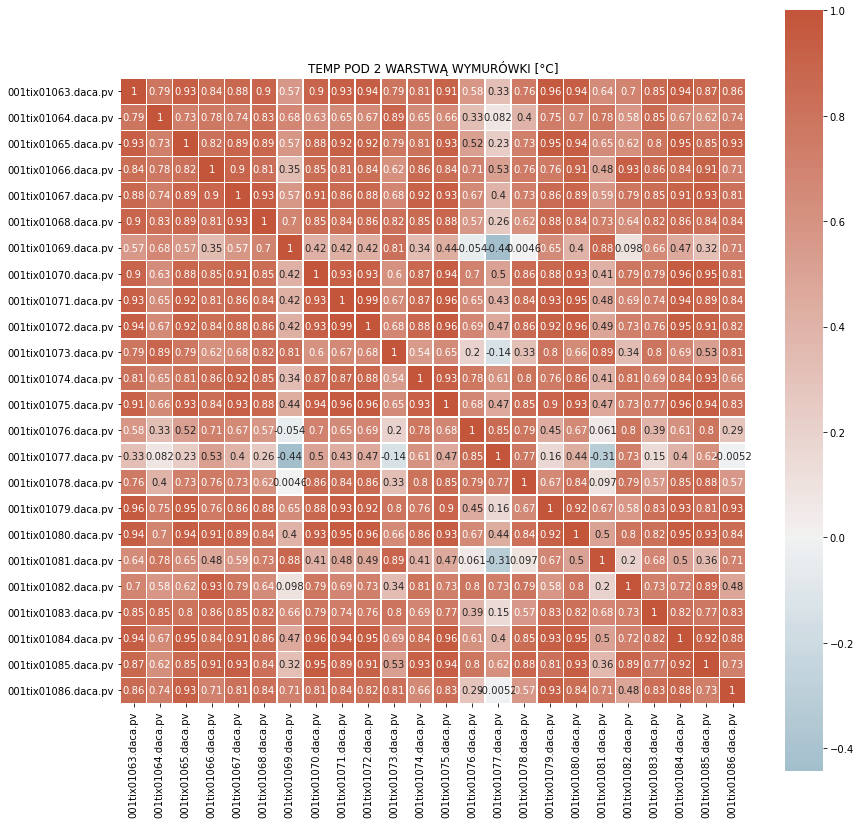

In [20]:
corr_plots(df[TIX1],
           size=14,
           titles=[group_names['TIX1']]
          )

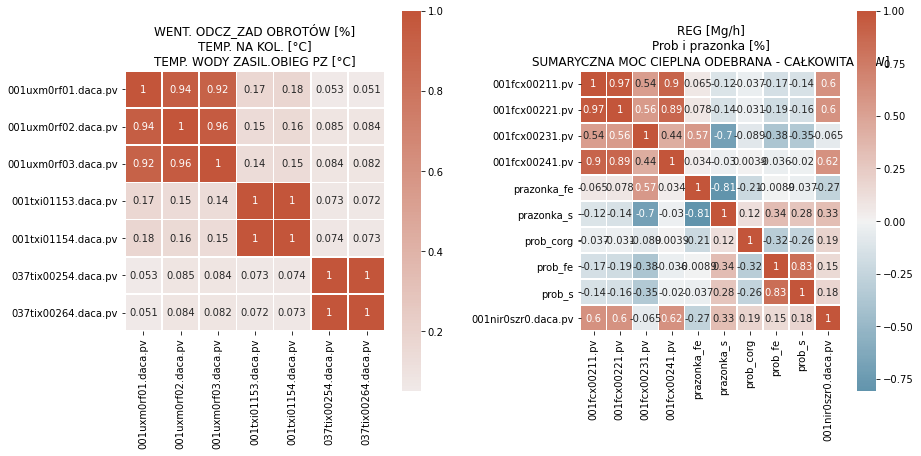

In [21]:
corr_plots(df[np.concatenate([UXM, TXI, TIX37])],
           df[np.concatenate([FCX, PR, NIR])],
          titles=[group_names['UXM'] + '\n' + group_names['TXI'] + '\n' + group_names['TIX37'],
                  group_names['FCX'] + '\n' + group_names['PR'] + '\n' + group_names['NIR']]
                  )

### PCA

In [22]:
# scaler = StandardScaler()
# data  = scaler.fit_transform(df[df.columns[1:]])

# pca = PCA(n_components=3)
# components = pca.fit_transform(data)

# total_var = pca.explained_variance_ratio_.sum() * 100

# fig = px.scatter_3d(
#     components, x=0, y=1, z=2,
#     title=f'Total Explained Variance: {total_var:.2f}%',
#     labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
#     height=500
# )
# fig.show()

### Features vs temp_zuzel

In [23]:
def plot_histograms_zuzlel(columns, ncols=3):
    n = len(columns)
    if n<ncols:
        ncols=n
        nrows=1
    else:
        nrows = int(np.ceil(n/ncols))
        
    f, axes = plt.subplots(figsize=(14, (8*nrows)//ncols), nrows=nrows, ncols=ncols)
    plt.subplots_adjust(wspace=0.2, hspace=0.6)
    for col, ax in zip(columns, axes.flatten()):
        sns.histplot(df[col], ax=ax, kde=True)
        ax.set_title(feature_desc(col), {'fontsize':10})

In [24]:
def get_corr_zuzel(col_name):
    return round(df[col_name].corr(df['temp_zuz']), 2)

In [25]:
def plot_with_zuzel(columns, ncols=3, no_desc=False):
    n = len(columns)
    if n<ncols:
        ncols=n
        nrows=1
    else:
        nrows = int(np.ceil(n/ncols))
        
    f, axes = plt.subplots(figsize=(14, (8*nrows)//ncols), nrows=nrows, ncols=ncols)
    plt.subplots_adjust(wspace=0.2, hspace=0.6)
    for col_name, ax in zip(columns, axes.flatten()):
        corr = get_corr_zuzel(col_name)
        description = col_name if no_desc else feature_desc(col_name)
        sns.scatterplot(x=df['temp_zuz'], y=df[col_name], ax=ax)
        ax.set_title(description, {'fontsize':10})
        ax.set(ylabel='', xlabel=("temp_zuz " + str(corr)))

In [26]:
# df_nona = df.dropna()

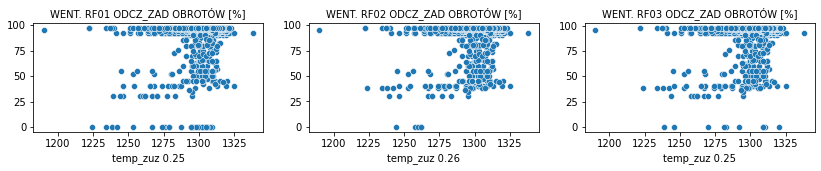

In [27]:
plot_with_zuzel(UXM)

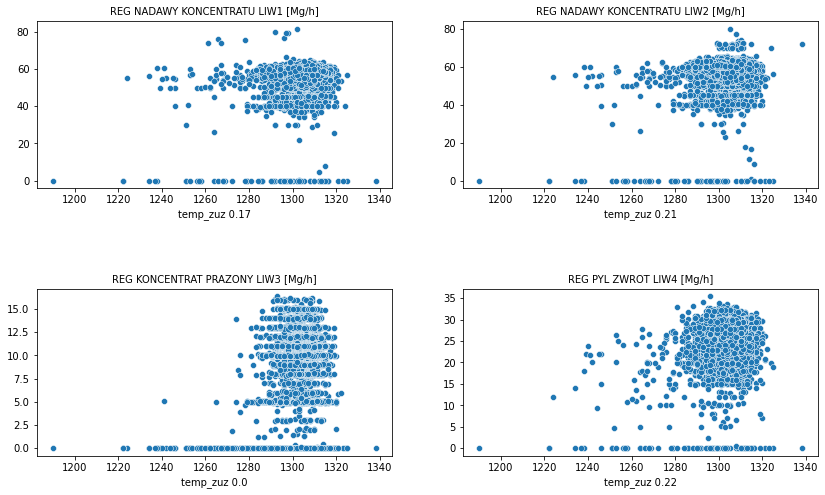

In [28]:
plot_with_zuzel(FCX, ncols=2)

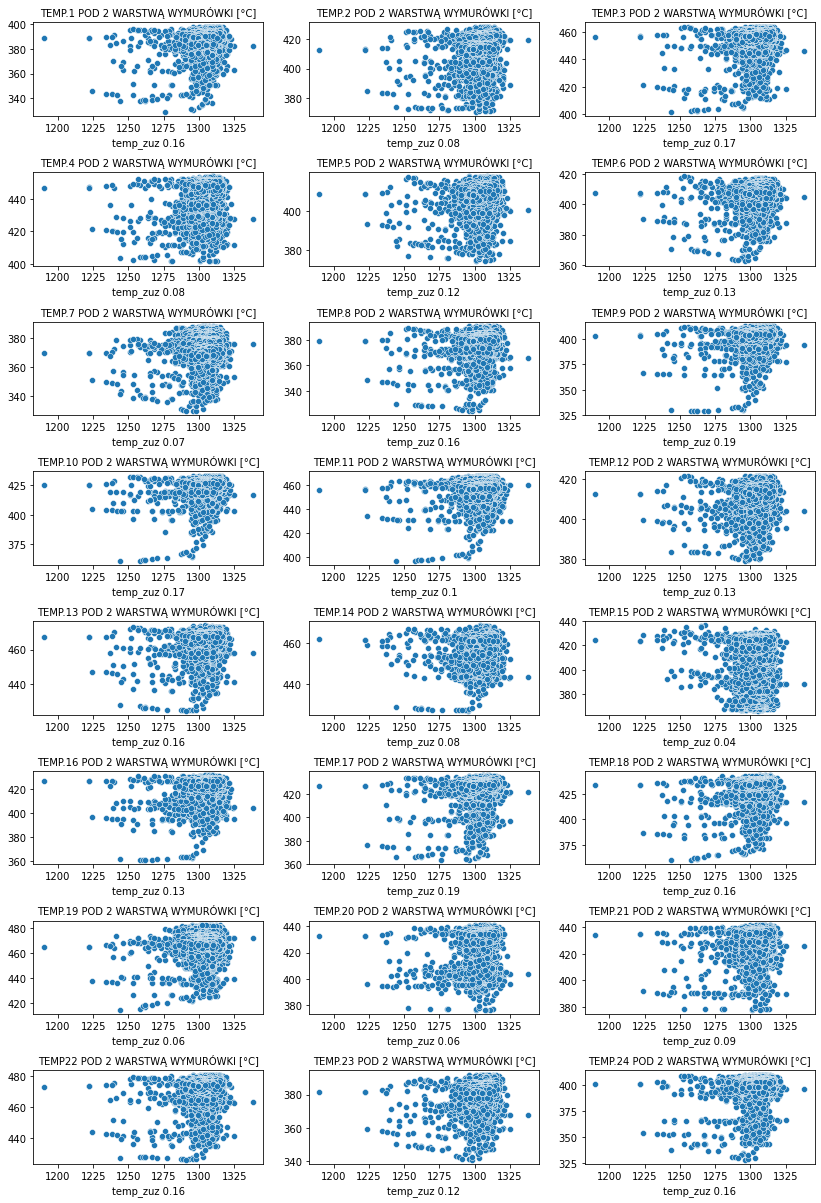

In [29]:
plot_with_zuzel(TIX1)

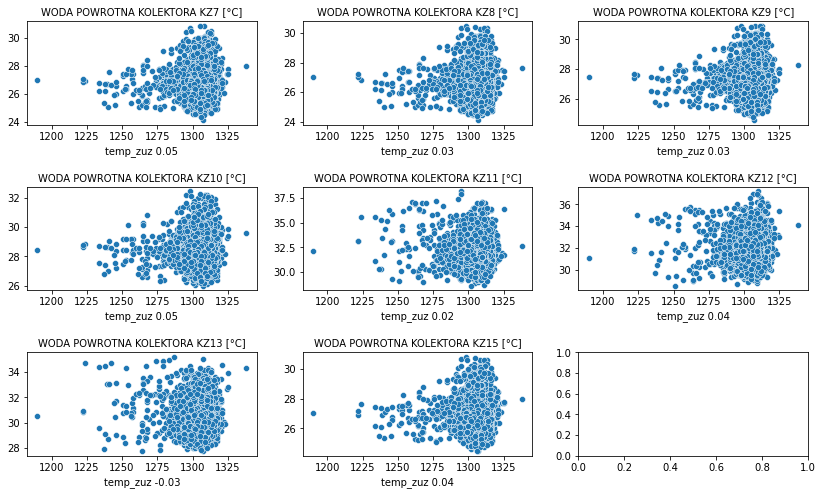

In [30]:
plot_with_zuzel(TIR)

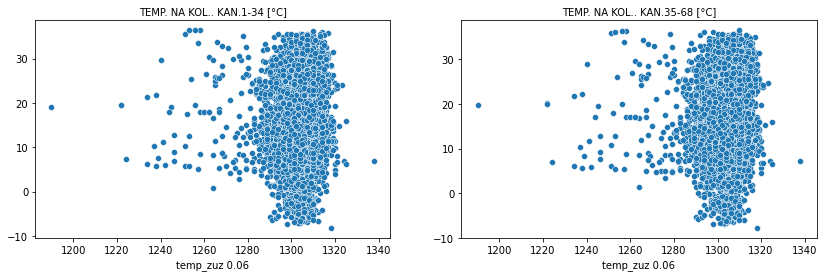

In [31]:
plot_with_zuzel(TXI)

korelacja między temp obiegu wody 1 a 2 : 0.9994513923961955


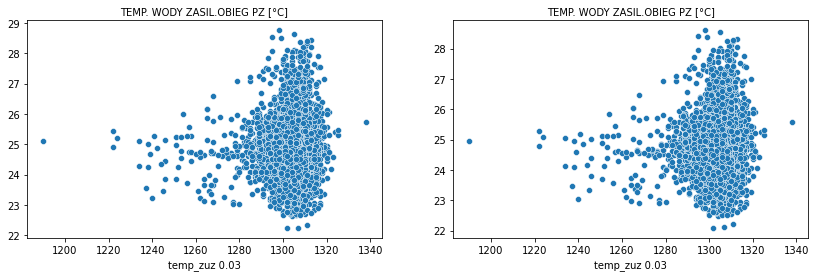

In [32]:
plot_with_zuzel(TIX37)
print("korelacja między temp obiegu wody 1 a 2 : " +str(df[TIX37[0]].corr(df[TIX37[1]])))

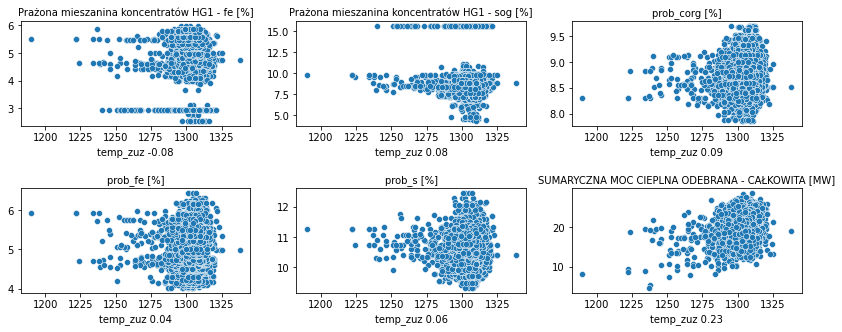

In [33]:
plot_with_zuzel(np.append(PR, NIR))

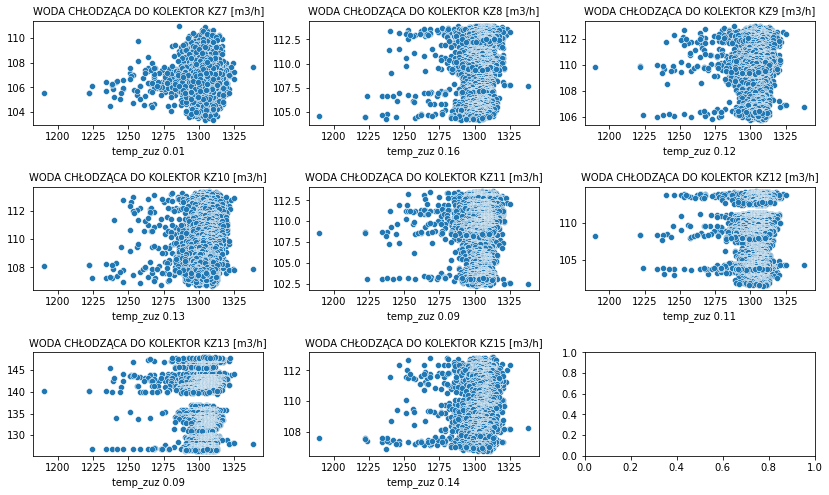

In [34]:
# WODA CHŁODZĄCA
plot_with_zuzel(FIR)

In [35]:
# DELTA = TIX37
cold_water = df[TIX37[0]]

for colname in TIR:
    df['delta_'+colname] = df[colname]-cold_water

In [36]:
DELTA = df.columns[df.columns.str.contains('delta')].values

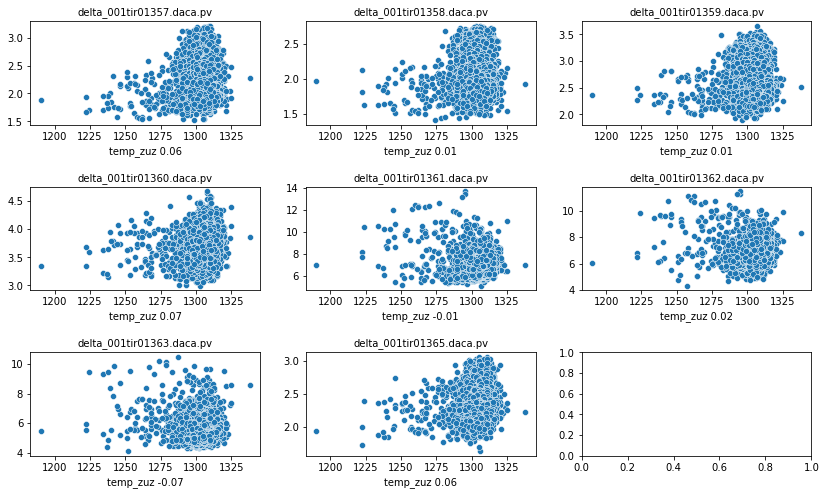

In [37]:
plot_with_zuzel(DELTA, no_desc=True)

In [38]:
# energy taken, (delta in temp) * (volume over time)
for delta_name, v_name in zip(DELTA, FIR):
    df['energy_'+delta_name[6:]] = df[delta_name] / df[v_name]

In [39]:
ENERGY = df.columns[df.columns.str.contains('energy')].values

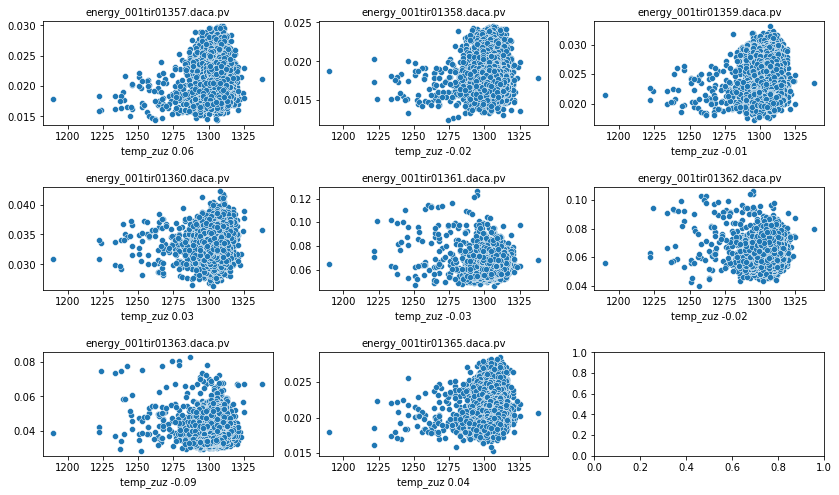

In [40]:
plot_with_zuzel(ENERGY, no_desc=True)